In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show(image, title=None):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## A black image with white boxes

In [18]:
img = (500,500,3) # (height, width, channels)
black_img = np.zeros(img, dtype=np.uint8)

black_img[100:200, 100:200, :] = [255, 255, 255]
black_img[100:200, 300:400, :] = [255, 255, 255] 

# Display the image using OpenCV
cv2.imshow("Black", black_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Image addition (averaging) for noise reduction

In [28]:
image1 = cv2.imread('../03_OpenCV/images/circuit.jpg')
image2 = cv2.imread('../03_OpenCV/images/circuit2.png')

if image1 is None or image2 is None:
    print("Error: Could not read one or both of the images")
    exit()
# Resize image2 to match the size of image1
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

resultImage = cv2.add(image1, image2)

cv2.imshow("Image 1", image1)
cv2.imshow("Image 2", image2)
cv2.imshow("Result Image", resultImage)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Comparing images using subtraction

In [32]:
image1 = cv2.imread('../03_OpenCV/images/circuit.jpg')
image2 = cv2.imread('../03_OpenCV/images/circuit2.png')

if image1 is None or image2 is None:
    print("Error: Could not read one or both of the images")
    exit()
# Resize image2 to match the size of image1
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Compute the absolute difference between the two images
differenceImage = cv2.absdiff(image1, image2)

cv2.imshow("Image 1", image1)
cv2.imshow("Image 2", image2)
cv2.imshow("Result Image", differenceImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image multiplication and division for shading correction and for masking

In [35]:
# Shading correction using division
image = cv2.imread('../03_OpenCV/images/circuit.jpg')

# Convert the image to floating-point for accurate division
image_float = image.astype(np.float32)

shadding_image = cv2.GaussianBlur(image_float, (0,0), 5)

shadding_corrected_image = cv2.divide(image_float, shadding_image)

cv2.imshow("Original Image", image)
cv2.imshow("Shadding Image", shadding_image)
cv2.imshow("Result Image", shadding_corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Image multiplication for Masking
image = cv2.imread('../03_OpenCV/images/circuit.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
_, binary_mask = cv2.threshold(gray_image, 128, 288, cv2.THRESH_BINARY)

# Convert the binary mask to a 3-channel image
binary_mask_rgb = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)

masked_Image = cv2.multiply(image, binary_mask_rgb)

cv2.imshow("Original Image", image)
cv2.imshow("Shadding Image", masked_Image)
cv2.imshow("Result Image", masked_Image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Union

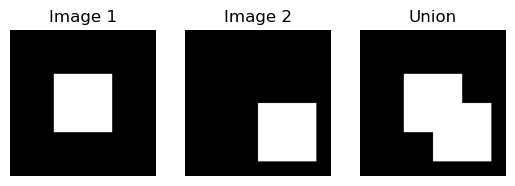

In [2]:
image1 = np.zeros((100,100), dtype=np.uint8)
image2 = np.zeros((100, 100), dtype=np.uint8)

# Set some pixels to 255 in both images
image1[30:70, 30:70] = 255
image2[50:90, 50:90] = 255

# Perform union
union_result = cv2.bitwise_or(image1, image2)

# Display the images and the result
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(union_result, cmap='gray')
plt.title('Union')
plt.axis('off')

plt.show()

## Intersection

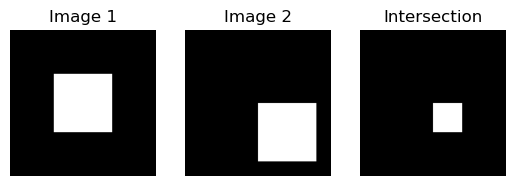

In [3]:
# Perform intersection
intersection_result = cv2.bitwise_and(image1, image2)

# Display the images and the result
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(intersection_result, cmap='gray')
plt.title('Intersection')
plt.axis('off')

plt.show()

## Compliment

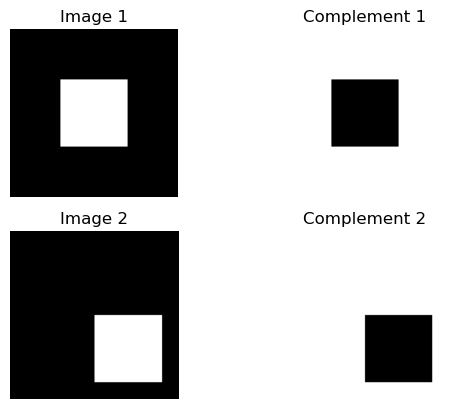

In [4]:
# Perform complement (negation) for each image
complement_image1 = cv2.bitwise_not(image1)
complement_image2 = cv2.bitwise_not(image2)

# Display the images and their complements
plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(complement_image1, cmap='gray')
plt.title('Complement 1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(complement_image2, cmap='gray')
plt.title('Complement 2')
plt.axis('off')

plt.show()